# Bimodal Gaussian Posterior - NPE_A method

In [1]:
import lfi
import torch
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## D = 2

### Success: 500

In [2]:
np.random.seed(21355)
torch.manual_seed(21)

In [3]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [4]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [25]:
simulation_budget=500
inference.fit(simulation_budget=simulation_budget, num_components=10)

  0%|          | 0/500 [00:00<?, ?it/s]

 Training neural network. Epochs trained: 1001

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

In [26]:
samples = inference.sample(1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

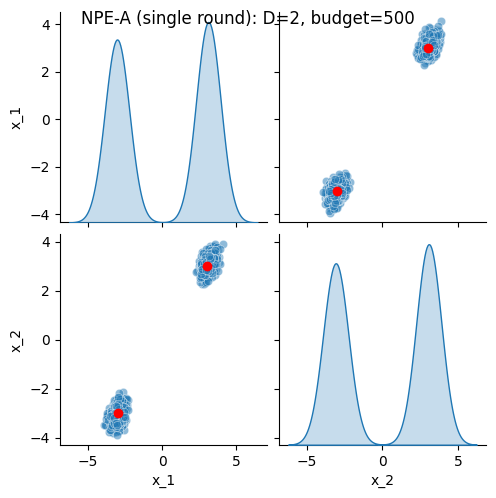

In [27]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

## D=5 (slightly higher dimensionality than toy case)

### failure budget=5_000

In [35]:
np.random.seed(21355)
torch.manual_seed(21)

In [36]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [37]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [38]:
simulation_budget = 5000
inference.fit(simulation_budget=simulation_budget, num_components=10)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 328 epochs.

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

In [39]:
samples = inference.sample(1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

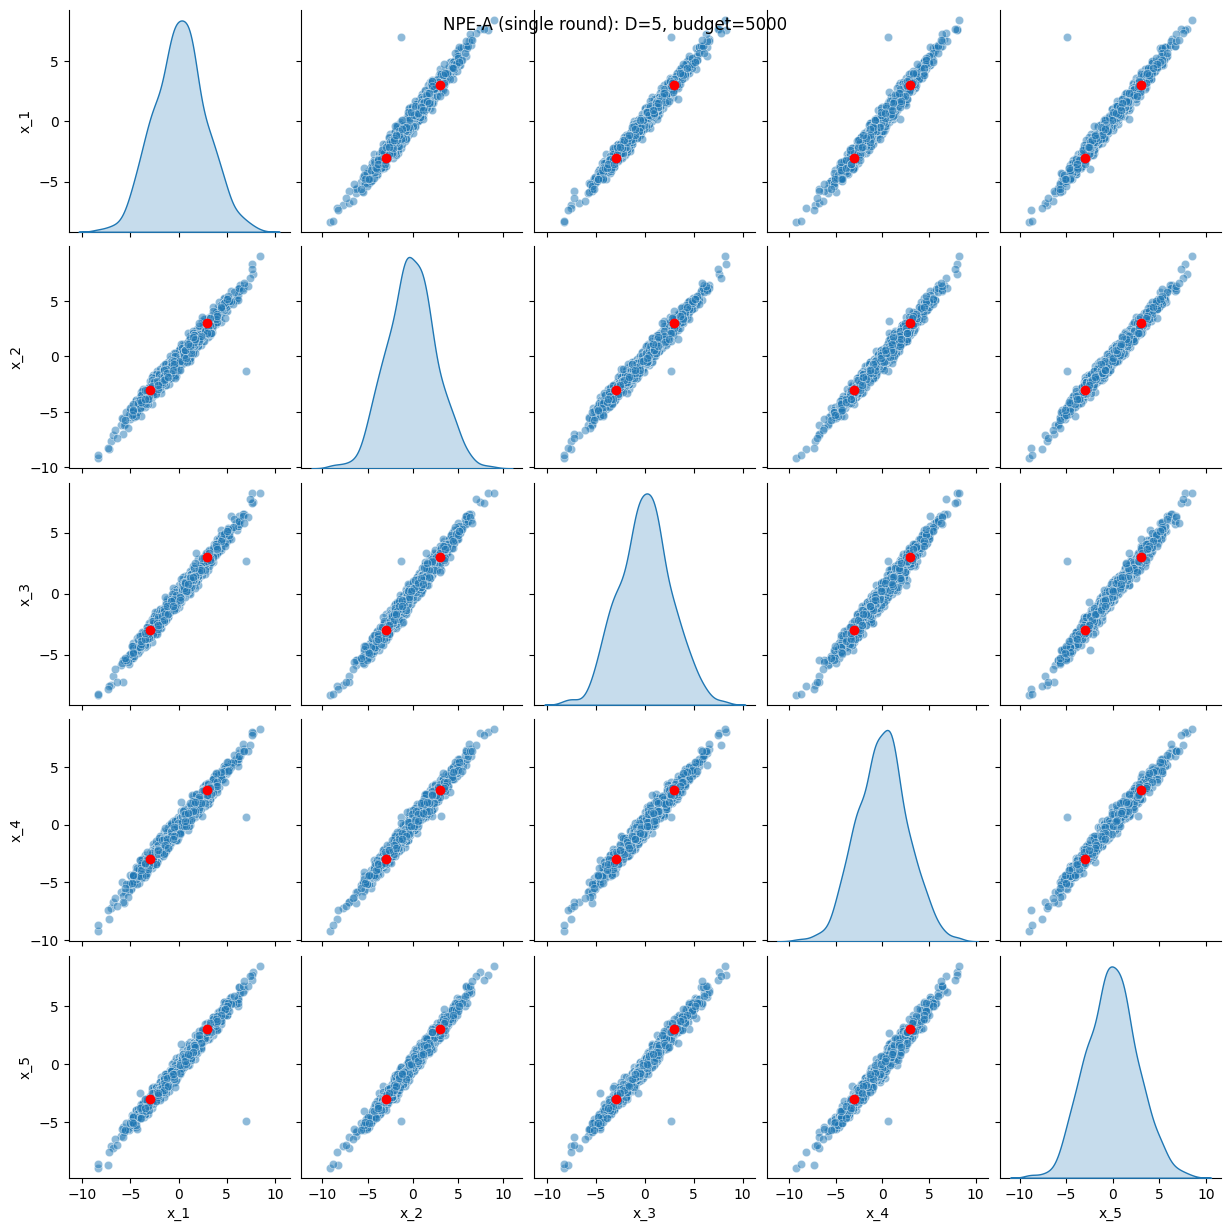

In [40]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)

### failure budget=25_000

In [54]:
np.random.seed(21355)
torch.manual_seed(21)

In [55]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1, D))
posterior_modes = np.ones((2,D))
posterior_modes[0,:] = -3.
posterior_modes[1,:] = 3.

In [56]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation=observation,
)

In [57]:
simulation_budget = 50_000
inference.fit(simulation_budget=simulation_budget, num_components=10)

  0%|          | 0/50000 [00:00<?, ?it/s]

 Neural network successfully converged after 156 epochs.

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

In [58]:
samples = inference.sample(1_000)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

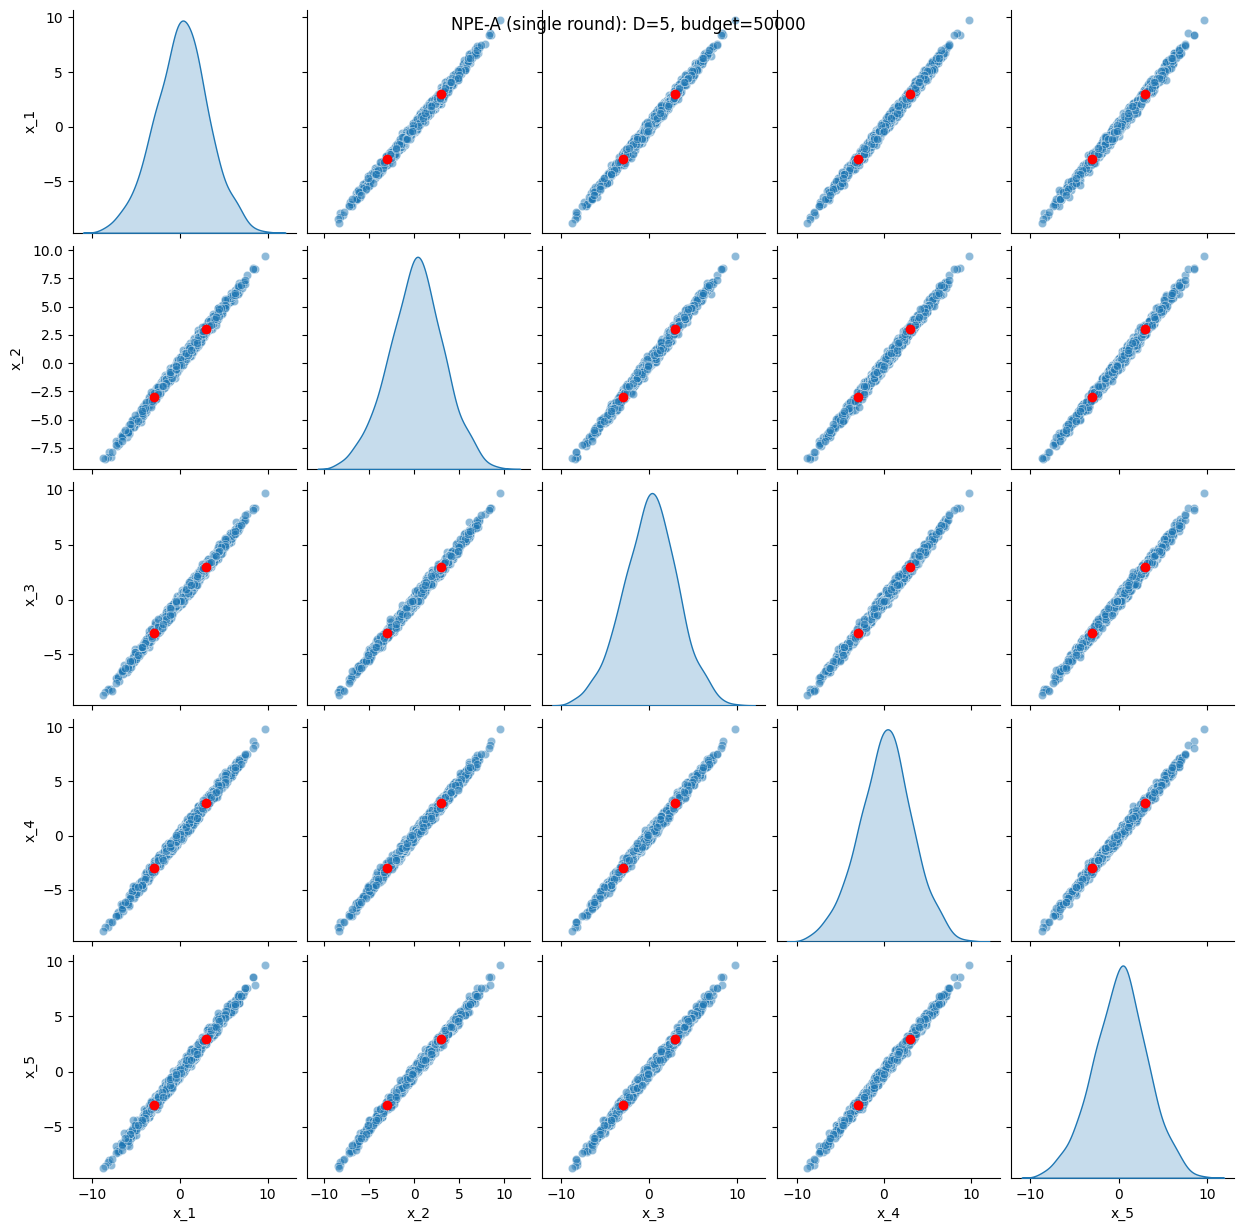

In [59]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=simulation_budget,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
    limits=torch.tensor([-10, 10.]).repeat(D, 1),
)